In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import StratifiedKFold
from nyaggle.feature.category_encoder import TargetEncoder

from nyaggle.experiment import run_experiment

In [2]:
train = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/train.csv')
test = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/test.csv')
era = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/era.csv')
sample_submission = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/sample_submission.csv')

In [3]:
#categorical変数抽出
cat_cols = [c for c in test.columns if train[c].dtype == np.object]

# numerical変数抽出
num_cols = [c for c in test.columns if train[c].dtype != np.object]

#目的変数抽出
target_col = 'is_kokuhou'

print(cat_cols)
print(num_cols)
print(target_col)

['棟名', '種別2', '国', '時代', '都道府県 ※美工品は「所有者住所（所在都道府県）」', '所在地', '保管施設の名称', '所有者名', '管理団体又は責任者']
['緯度', '経度']
is_kokuhou


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [4]:
#カテゴリ変数の欠損値をmissingで埋める
train[cat_cols] = train[cat_cols].fillna('missing')
test[cat_cols] = test[cat_cols].fillna('missing')

0:	learn: 0.5101157	test: 0.5098779	best: 0.5098779 (0)	total: 50.2ms	remaining: 8m 22s
1:	learn: 0.4032820	test: 0.4016697	best: 0.4016697 (1)	total: 55.7ms	remaining: 4m 38s
2:	learn: 0.3315779	test: 0.3295894	best: 0.3295894 (2)	total: 68.1ms	remaining: 3m 46s
3:	learn: 0.2923808	test: 0.2918364	best: 0.2918364 (3)	total: 81.2ms	remaining: 3m 22s
4:	learn: 0.2646710	test: 0.2676039	best: 0.2676039 (4)	total: 91.2ms	remaining: 3m 2s
5:	learn: 0.2536974	test: 0.2580567	best: 0.2580567 (5)	total: 95.8ms	remaining: 2m 39s
6:	learn: 0.2411224	test: 0.2496074	best: 0.2496074 (6)	total: 112ms	remaining: 2m 39s
7:	learn: 0.2353941	test: 0.2443975	best: 0.2443975 (7)	total: 115ms	remaining: 2m 23s
8:	learn: 0.2233125	test: 0.2386792	best: 0.2386792 (8)	total: 126ms	remaining: 2m 19s
9:	learn: 0.2143933	test: 0.2347222	best: 0.2347222 (9)	total: 138ms	remaining: 2m 18s
10:	learn: 0.2084780	test: 0.2330773	best: 0.2330773 (10)	total: 152ms	remaining: 2m 18s
11:	learn: 0.1994998	test: 0.2296732

/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 31278 (\N{CJK UNIFIED IDEOGRAPH-7A2E}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 21029 (\N{CJK UNIFIED IDEOGRAPH-5225}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 37117 (\N{CJK UNIFIED IDEOGRAPH-90FD}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 3

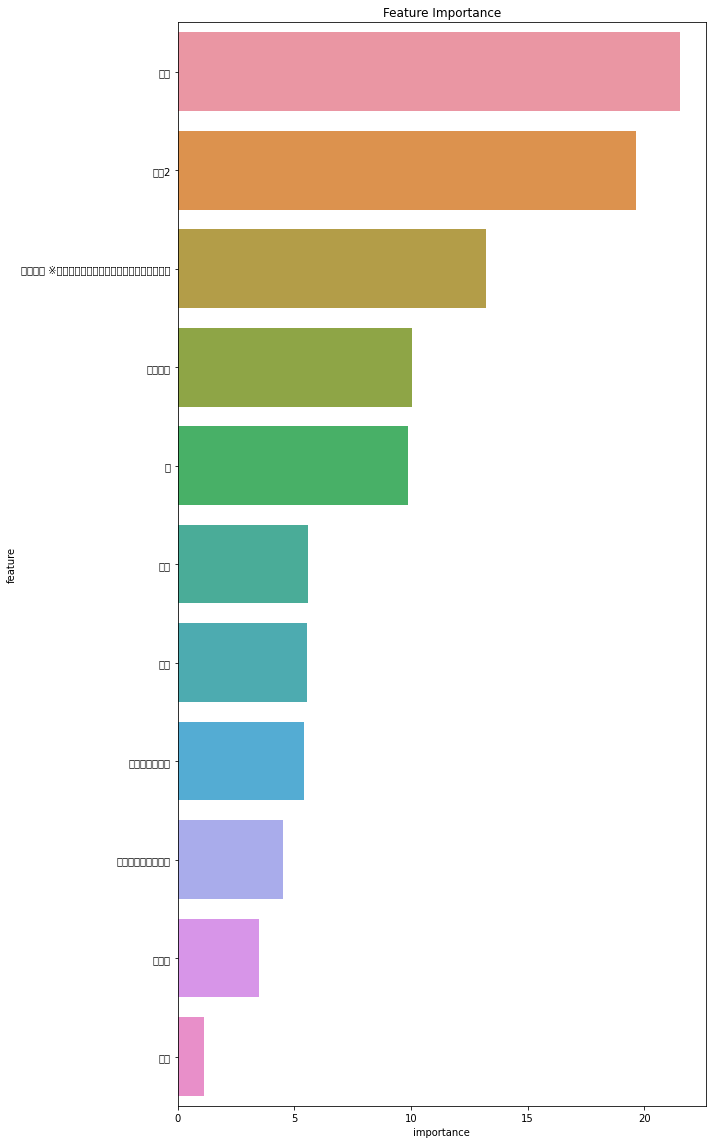

In [5]:
params = {
        "loss_function": 'Logloss', #'MAE', 'Logloss', 'AUC', 'MultiClass','RMSE'
        "learning_rate": 0.2, #0.05
        "iterations": 10000,
        "depth" : 10,
        "early_stopping_rounds":100,
        "random_seed":42531,
        "cat_features": cat_cols,
    }

result = run_experiment(
    params,
    train[num_cols + cat_cols],
    train[target_col],
    test[num_cols + cat_cols],
    cv=StratifiedKFold(5, shuffle=True, random_state=42531), # cv=5,
    #groups = train.book_id,
    #categorical_feature=["user_id","book_id"],→これLGBM用？
    algorithm_type='cat'
)

In [6]:
print(result.metrics) # Evalulation metrics for each fold

[0.8064291465378421, 0.7625281803542674, 0.8181199677938809, 0.7984500805152978, 0.8212556146831445, 0.8006157117235975]


In [7]:
result.importance     # Feature importance for each fold

[                      feature  importance
 0                          緯度    5.249118
 1                          経度    7.088539
 2                          棟名    1.646426
 3                         種別2   20.419344
 4                           国    9.984755
 5                          時代   21.310484
 6   都道府県 ※美工品は「所有者住所（所在都道府県）」   11.615247
 7                         所在地    2.813135
 8                     保管施設の名称    5.590374
 9                        所有者名   10.873901
 10                  管理団体又は責任者    3.408678,
                       feature  importance
 0                          緯度    4.849381
 1                          経度    3.407010
 2                          棟名    0.778672
 3                         種別2   19.230412
 4                           国   14.830818
 5                          時代   22.961605
 6   都道府県 ※美工品は「所有者住所（所在都道府県）」   14.180930
 7                         所在地    3.060600
 8                     保管施設の名称    2.475001
 9                        所有者名    7.406503
 10       

In [8]:
print(result.test_prediction)  # Test prediction in numpy array
print(result.oof_prediction)   # Out-of-fold prediction in numpy array

[0.02841685 0.15895831 0.30228301 ... 0.32700039 0.04852963 0.0218273 ]
[0.02752823 0.14470681 0.33822124 ... 0.09477487 0.25213637 0.03404881]


In [9]:
# データ全体のF1スコアを計算 & 閾値の最適化
from sklearn.metrics import f1_score

def find_optimal_threshold(y_true, y_scores):
    thresholds = np.linspace(0, 1, 100)
    best_threshold = 0
    best_score = 0

    for threshold in thresholds:
        y_pred = (y_scores > threshold).astype(int)
        score = f1_score(y_true, y_pred)

        if score > best_score:
            best_score = score
            best_threshold = threshold

    return best_threshold, best_score

# 例として使用するデータ（実際にはモデルからの予測値と実際のラベルを使用）
y_true = train[target_col].values
y_scores = result.oof_prediction

best_threshold, best_f1_score = find_optimal_threshold(y_true, y_scores)
print(f"Best threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1_score}")

Best threshold: 0.20202020202020204
Best F1 Score: 0.3349950149551346


In [10]:
# 閾値を超える確率を持つ要素を1に、それ以外を0に変換
y_pred = (result.test_prediction > best_threshold).astype(int)
print(y_pred)
print(y_pred.shape)

[0 0 1 ... 1 0 0]
(10065,)


In [11]:
sample_submission['is_kokuhou'] = y_pred
sample_submission

,is_kokuhou
0,0
1,0
2,1
3,0
4,0
...,...
10060,0
10061,0
10062,1
10063,0


In [12]:
sample_submission["is_kokuhou"].value_counts()

0    9340
1     725
Name: is_kokuhou, dtype: int64

In [16]:
sample_submission.to_csv('catboost_ver1.csv', index=False)

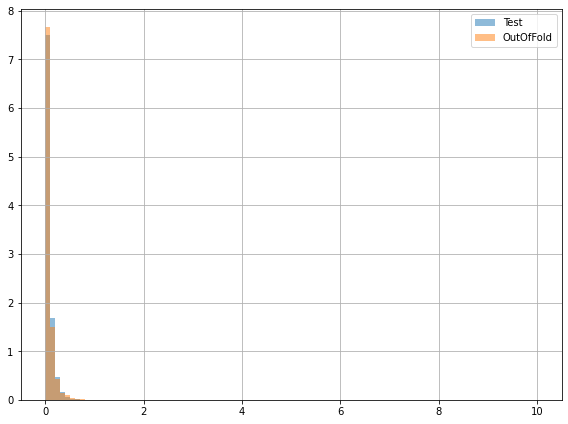

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))

vmax = .02
bins = np.linspace(0, 10, 100)
ax.hist(result.test_prediction, bins=bins, density=True, alpha=.5, label="Test")
ax.hist(result.oof_prediction, bins=bins, density=True, alpha=.5, label="OutOfFold")
ax.grid()
ax.legend()
# ax.set_title("テストと学習時の予測傾向差分")

fig.tight_layout()

In [20]:
print(result.test_prediction)
print(result.oof_prediction)

[0.02841685 0.15895831 0.30228301 ... 0.32700039 0.04852963 0.0218273 ]
[0.02752823 0.14470681 0.33822124 ... 0.09477487 0.25213637 0.03404881]


In [22]:
df_oof = pd.DataFrame({'cat_ver1_oof':result.oof_prediction})
df_test = pd.DataFrame({'cat_ver1_test' : result.test_prediction})

In [23]:
print(df_oof.shape)
print(df_test.shape)

(6710, 1)
(10065, 1)


In [24]:
df_oof.to_csv('cat_ver1_oof.csv', index=False)
df_test.to_csv('cat_ver1_test.csv', index=False)